# EDA

In [131]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [43]:
data = pd.read_csv('../data/raw/u.data', sep='\t', header=None)
data = data.rename(columns={0: 'user_id', 1: 'film_id', 2: 'rating', 3: 'time'})

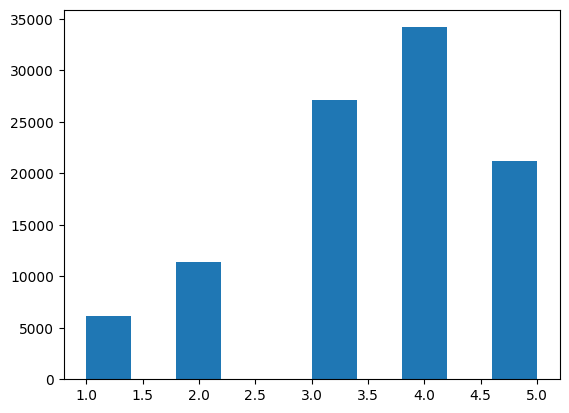

In [47]:
plt.hist(data.rating);

## Users

In [152]:
users = pd.read_csv('../data/raw/u.user', sep='|', header=None, index_col=0)
users = users.rename(columns={1: 'age', 2: 'gender', 3: 'occupation', 4: 'zipcode'})
users.index.names = ['id']
users

,age,gender,occupation,zipcode
id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


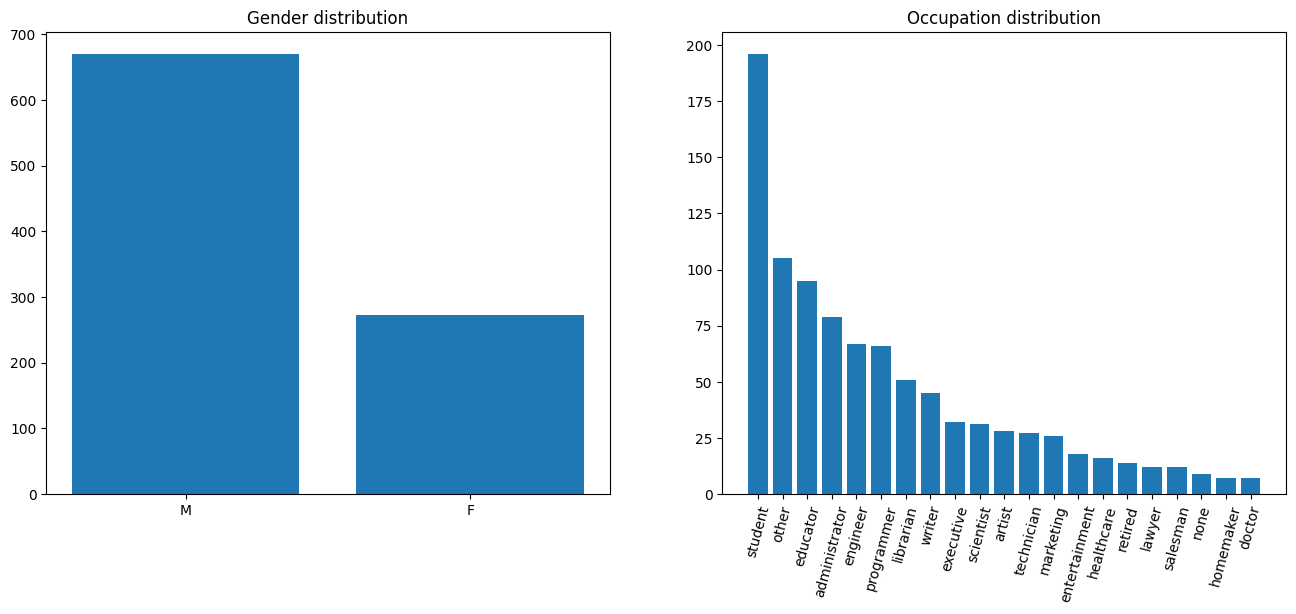

In [153]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.title('Gender distribution')
gender_count = users.gender.value_counts()
_len = np.arange(len(gender_count))
plt.bar(_len, height=users.gender.value_counts())
plt.xticks(_len, gender_count.index.to_list());
plt.subplot(122)
plt.title('Occupation distribution')
occupation_count = users.occupation.value_counts()
_len = np.arange(len(occupation_count))
plt.bar(_len, height=occupation_count)
plt.xticks(_len, occupation_count.index.to_list(), rotation=75);

In [154]:
users['ratings'] = [[] for _ in range(len(users))]
for user_id, rating in tqdm(zip(data.user_id, data.rating), total=len(data)):
    users.loc[user_id].ratings.append(rating)
users['rating_mean'] = users.ratings.apply(np.mean)
users['rating_std'] = users.ratings.apply(np.std)

  0%|          | 0/100000 [00:00<?, ?it/s]

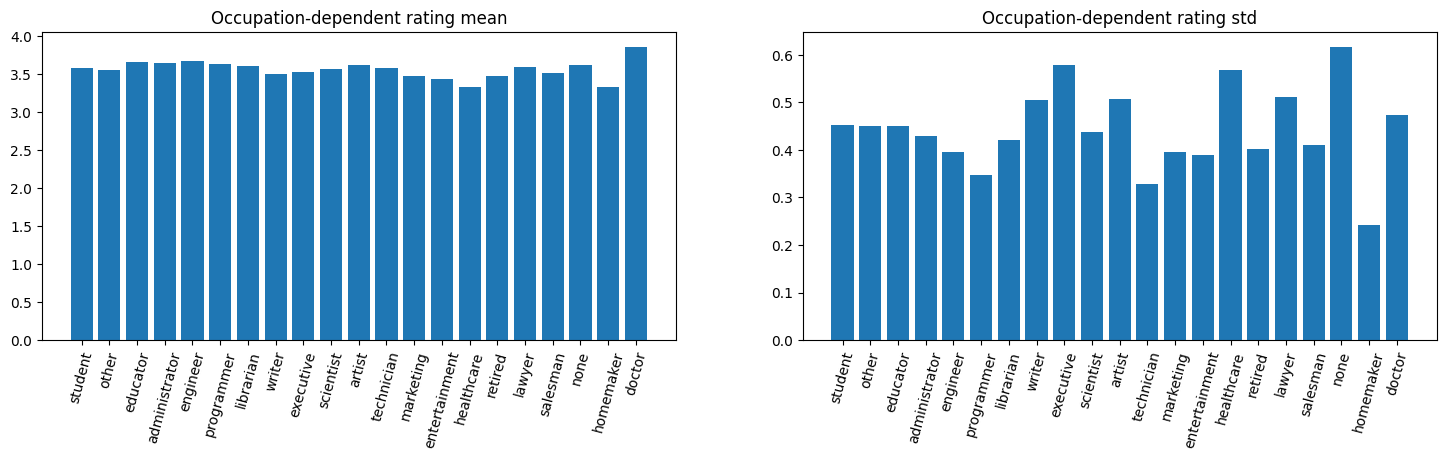

In [158]:
plt.figure(figsize=(18, 4))
plt.subplot(121)
plt.title('Occupation-dependent rating mean')
occupation_names = users.occupation.value_counts().index.to_list()
_len = np.arange(len(occupation_names))
plt.bar(_len, height=[users[users.occupation == occ].rating_mean.mean() for occ in occupation_names])
plt.xticks(_len, occupation_names, rotation=75);
plt.subplot(122)
plt.title('Occupation-dependent rating std')
occupation_names = users.occupation.value_counts().index.to_list()
_len = np.arange(len(occupation_names))
plt.bar(_len, height=[users[users.occupation == occ].rating_mean.std() for occ in occupation_names])
plt.xticks(_len, occupation_names, rotation=75);

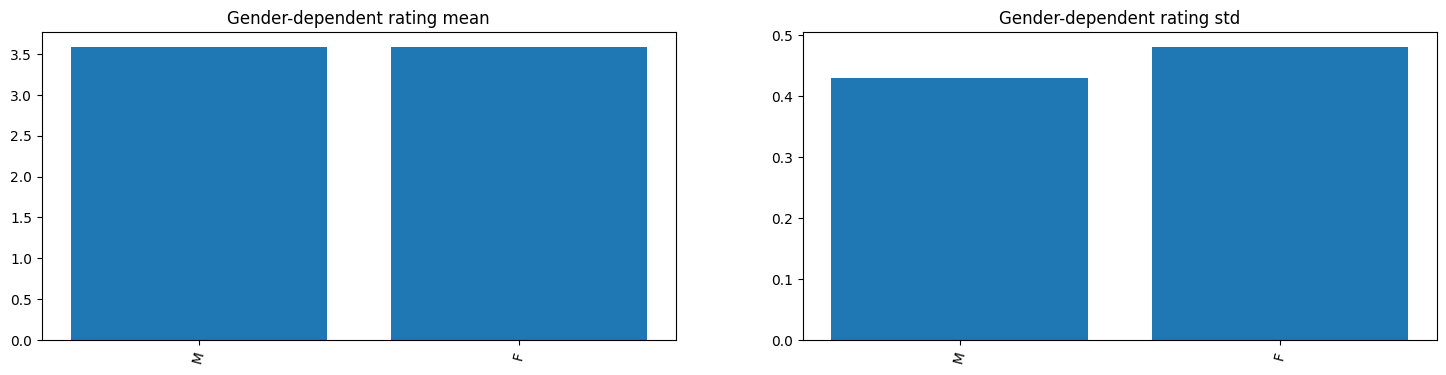

In [159]:
plt.figure(figsize=(18, 4))
plt.subplot(121)
plt.title('Gender-dependent rating mean')
gender_names = users.gender.value_counts().index.to_list()
_len = np.arange(len(gender_names))
plt.bar(_len, height=[users[users.gender == g].rating_mean.mean() for g in gender_names])
plt.xticks(_len, gender_names, rotation=75);
plt.subplot(122)
plt.title('Gender-dependent rating std')
occupation_names = users.gender.value_counts().index.to_list()
_len = np.arange(len(occupation_names))
plt.bar(_len, height=[users[users.gender == g].rating_mean.std() for g in gender_names])
plt.xticks(_len, gender_names, rotation=75);

## Movies

In [107]:
genres_mapping = pd.read_csv('../data/raw/u.genre', sep='|', header=None, index_col=1)

In [139]:
movies = pd.read_csv('../data/raw/u.item', sep='|', header=None, index_col=0, encoding_errors='replace')
movies.index.names = ['id']
del movies[3]
movies = movies.rename(columns={5 + i: row[0] for i, row in genres_mapping.iterrows()})
print(len(movies))
movies = movies.dropna(how='any')
print(len(movies))
movies

1682
1679


,1,2,4,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


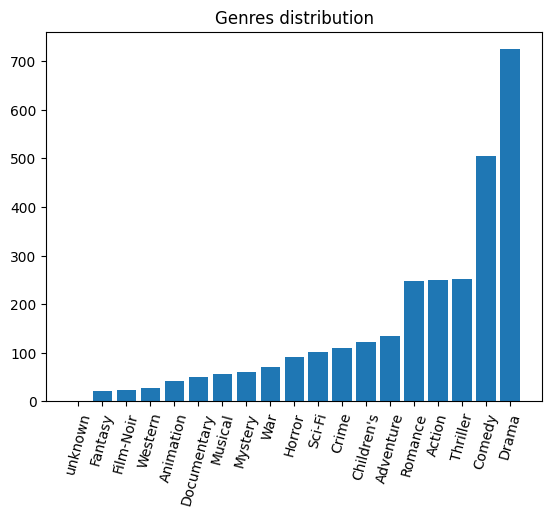

In [140]:
genres_counts = movies[[*genres_mapping[[0]][0].to_list()]]
genres_counts = genres_counts.sum().sort_values()

plt.title('Genres distribution')
genres_names = genres_counts.index.to_list()
_len = np.arange(len(genres_names))
plt.bar(_len, height=genres_counts)
plt.xticks(_len, genres_names, rotation=75);

In [142]:
movies['date'] = movies[2].apply(lambda x: datetime.datetime.strptime(x, "%d-%b-%Y").date())

In [149]:
movies['date'].min(), movies['date'].max()

(datetime.date(1922, 1, 1), datetime.date(1998, 10, 23))

In [181]:
# Genre-wise ratings (the code can probably be cleaned, check this later)
movies['ratings'] = [[] for _ in range(len(movies))]
for movie_id, rating in tqdm(zip(data.film_id, data.rating), total=len(data)):
    if movie_id in movies.index:
        movies.loc[movie_id].ratings.append(rating)
    else:
        print(movie_id)
movies['rating_mean'] = movies.ratings.apply(np.mean)
movies['rating_std'] = movies.ratings.apply(np.std)

  0%|          | 0/100000 [00:00<?, ?it/s]

267
267
267
267
267
267
1359
1359
1358
267
267
1358
267


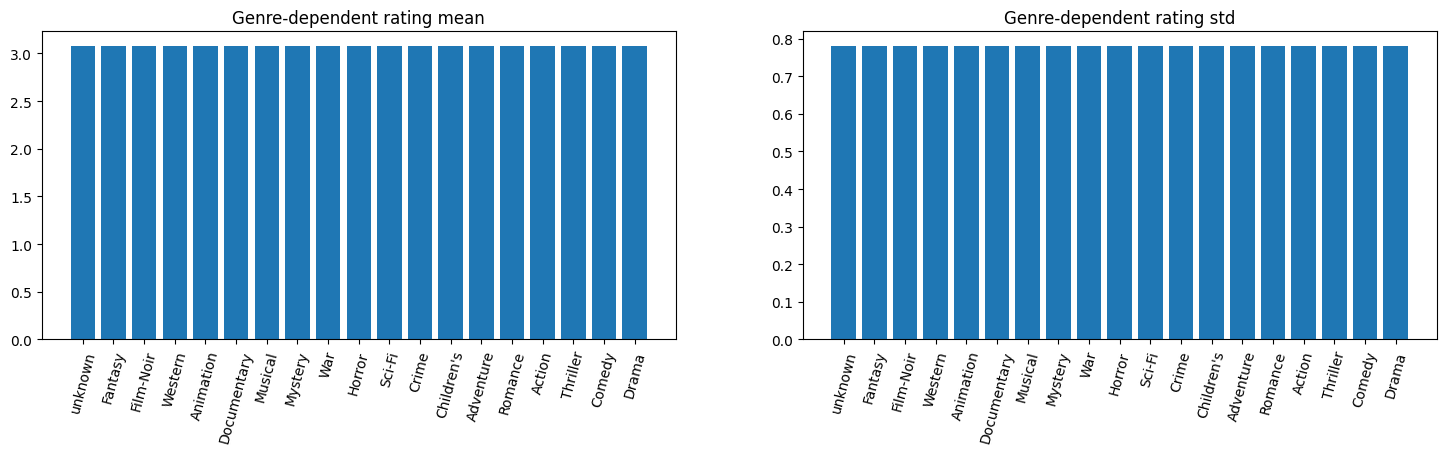

In [192]:
plt.figure(figsize=(18, 4))
plt.subplot(121)
plt.title('Genre-dependent rating mean')
_len = np.arange(len(genres_names))
plt.bar(_len, height=[movies.loc[(movies[[genre]] == 1).index].rating_mean.mean() for genre in genres_names])
plt.xticks(_len, genres_names, rotation=75);
plt.subplot(122)
plt.title('Genre-dependent rating std')
plt.bar(_len, height=[movies.loc[(movies[[genre]] == 1).index].rating_mean.std() for genre in genres_names])
plt.xticks(_len, genres_names, rotation=75);

# EDA conclusions

There is no notable bias in the ratings by gender, occupation, and movie genre. There is, however, an underrepresentation of female users in the dataset, and users' occupation is primarily represented by "student", with other jobs falling short by abount 50% or more.